In [1]:
#objective: concatenate the state, not replace it
from typing import Dict, TypedDict
from langgraph.graph import StateGraph 

In [2]:
class AgentState(TypedDict): # our state schema
    name : str
    message : str

#objective: concatenate the state, not replace it
def greeting_node(state: AgentState) -> AgentState:
    """A simple greeting node that adds a greeting message to the state."""
    return {
        **state,
        "message": state.get("message", "") + #“Give me state["message"] if it exists, otherwise give me an empty string.”
                   f"{state['name']}, you're doing an amazing job learning LangGraph!"
    }

    # previous = state.get('message', '')
    # state['message'] = previous + " Welcome back "+ state['name'] +"!, you are doing great!"
    
    # return state
    
def motivation_node(state: AgentState) -> AgentState:
    return {
        **state,
        "message": state.get("message", "") +
                   "\nKeep pushing forward 🚀\n"
    }

In [3]:
graph = StateGraph(AgentState) 

graph.add_node("greeter", greeting_node)
graph.add_node("motivation", motivation_node)

graph.set_entry_point("greeter")
graph.add_edge("greeter", "motivation")
graph.set_finish_point("motivation")

app = graph.compile() # compile the graph into an executable application

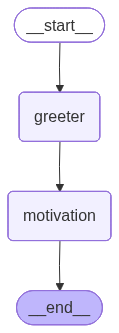

In [4]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
result = app.invoke({
    "name": "Hari",
    "message": ""
})

print(result["message"])


Hari, you're doing an amazing job learning LangGraph!
Keep pushing forward 🚀

